## Data preprocessing

In [45]:
import torch
import os
import json
from PIL import Image
import numpy as np
from tqdm import tqdm
from sklearn.utils import shuffle

from layers.ResNet import ResNet
from torch.utils.data import DataLoader
from torchvision import transforms
from MyDataset import MyDataset

In [46]:
coco_train_path = 'mscoco/train/annotations/captions_train2014.json'
coco_test_path = 'mscoco/test/annotations/captions_val2014.json'
extracted_data_path = 'extracted_data/'

extracted_imgs_train = 'extracted_data/train/vecs/'
extracted_imgs_test = 'extracted_data/test/vecs/'

train_size = 50000
test_size = 10000

In [47]:
def save_captions(in_file, out_file, max_size=10000, im_type='train'):
    with open(in_file) as f:
        data = json.load(f)

    captions = []
    image_paths = []
    unique_imgs = set()
    
    path = '/'.join(in_file.split('/')[:2]) + '/img/'

    for element in data['annotations']:
        captions.append('<START> ' + element['caption'] + ' <END>')
        image_id = element['image_id']
        image_paths.append(path + 'COCO_%s2014_%012d' % (im_type, image_id))
        unique_imgs.add(str(image_id))
        if len(unique_imgs) >= max_size : break


    with open(out_file + '/captions.json', 'w') as f1:
        f1.write(json.dumps(captions))

    with open(out_file + '/image_paths.json', 'w') as f2:
        f2.write(json.dumps(image_paths))

    return shuffle(captions, image_paths, random_state=123)

In [48]:
train_captions, train_image_paths = save_captions(in_file=coco_train_path, 
                                                  out_file=extracted_data_path + 'train',
                                                  max_size=train_size)

In [49]:
test_captions, test_image_paths = save_captions(coco_test_path, 
                                                extracted_data_path + 'test',
                                                max_size=test_size,
                                                im_type='val')

In [50]:
print(len(train_image_paths), len(test_image_paths))
print(len(set(train_image_paths)), len(set(test_image_paths)))

249454 49569
50000 10000


In [51]:
#train_captions, train_image_paths = train_captions[:train_size], train_image_paths[:train_size]
#test_captions, test_image_paths = test_captions[:test_size], test_image_paths[:test_size]

### Verify data

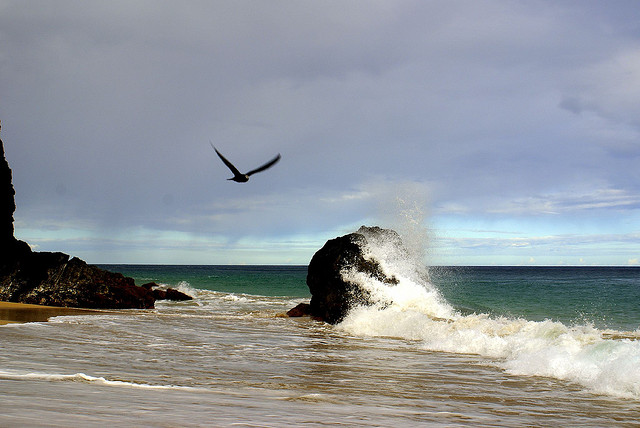

<START> A bird flying over a wave crashing into a large rock. <END>


In [52]:
index = int(np.random.random() * 1000)
im = Image.open(train_image_paths[index]+'.jpg')
display(im)
print(train_captions[index])

## Cache image data

In [53]:
resnet = ResNet()

In [64]:
def preprocess_image(img_path):
    img = Image.open(img_path +'.jpg')
    if len(np.array(img).shape) == 2: 
        img = img.convert('RGB')
    img = transform_image(img)
    return img

def pycoco_preprocess(img, target):
    if len(np.array(img).shape) == 2: 
        img = img.convert('RGB')
    img = transform_image(img)
    return img, target

def transform_image(img, input_size=256):
    img = transforms.Resize(input_size)(img)
    img = transforms.CenterCrop(input_size)(img)
    img = transforms.ToTensor()(img)
    img =  transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])(img)
    img = resnet(img.unsqueeze(0))
    return img

In [65]:
def cache(img_paths, output_dir):
    for image_name in tqdm(sorted(set(img_paths))):
        img = preprocess_image(image_name)
        torch.save(img, output_dir + image_name.split('/')[-1] + '.pt')

In [58]:
torch.set_num_threads(3)

In [59]:
#cache(train_image_paths, extracted_imgs_train)


100%|██████████████████████████████████████████████████████████████████████████| 50000/50000 [4:58:35<00:00,  2.79it/s]


In [60]:
with open('extracted_data/train/captions_train.json', 'w') as f1:
        f1.write(json.dumps(train_captions[:40000]))

with open('extracted_data/train/captions_val.json', 'w') as f2:
        f2.write(json.dumps(train_captions[40000:]))

In [61]:
with open('extracted_data/train/image_paths_train.json', 'w') as f2:
        f2.write(json.dumps(train_image_paths[:40000]))

with open('extracted_data/train/image_paths_val.json', 'w') as f2:
        f2.write(json.dumps(train_image_paths[40000:]))

In [66]:
cache(test_image_paths, extracted_imgs_test)

  0%|                                                                                        | 0/10000 [00:00<?, ?it/s]

torch.Size([3, 256, 256])


  0%|                                                                                | 1/10000 [00:00<52:41,  3.16it/s]

torch.Size([3, 256, 256])


  0%|                                                                                | 2/10000 [00:00<52:22,  3.18it/s]

torch.Size([3, 256, 256])


  0%|                                                                                | 3/10000 [00:00<52:34,  3.17it/s]

torch.Size([3, 256, 256])


  0%|                                                                                | 4/10000 [00:01<53:53,  3.09it/s]

torch.Size([3, 256, 256])


  0%|                                                                                | 5/10000 [00:01<55:24,  3.01it/s]

torch.Size([3, 256, 256])


  0%|                                                                                | 6/10000 [00:01<54:26,  3.06it/s]

torch.Size([3, 256, 256])


  0%|                                                                                | 7/10000 [00:02<54:11,  3.07it/s]

torch.Size([3, 256, 256])


  0%|                                                                                | 8/10000 [00:02<54:10,  3.07it/s]

torch.Size([3, 256, 256])


  0%|                                                                                | 9/10000 [00:02<53:45,  3.10it/s]

torch.Size([3, 256, 256])


  0%|                                                                               | 10/10000 [00:03<53:16,  3.13it/s]

torch.Size([3, 256, 256])


  0%|                                                                               | 11/10000 [00:03<53:25,  3.12it/s]

torch.Size([3, 256, 256])


  0%|                                                                               | 12/10000 [00:03<54:06,  3.08it/s]

torch.Size([3, 256, 256])


KeyboardInterrupt: 

In [32]:
import torchvision.datasets as dset
cap = dset.CocoCaptions(root = 'mscoco/train/img',
                        annFile = 'mscoco/train/annotations/captions_train2014.json',
                        transforms=pycoco_preprocess)

print('Number of samples: ', len(cap))
img, target = cap[0] # load 4th sample

print("Image Size: ", img.size())
print(target)

loading annotations into memory...
Done (t=0.70s)
creating index...
index created!
Number of samples:  82783
Image Size:  torch.Size([1, 8, 8, 2048])
['Closeup of bins of food that include broccoli and bread.', 'A meal is presented in brightly colored plastic trays.', 'there are containers filled with different kinds of foods', 'Colorful dishes holding meat, vegetables, fruit, and bread.', 'A bunch of trays that have different food.']


In [35]:
x,y = cap[8]
print(y)

['A train coming to a stop on the tracks out side.', 'The very long train is travelling down the tracks.', 'A passenger train glides around a curve on the outer track.', 'A train coming down the tracks in the city.', 'A train engine carrying many carts down a track.']


In [31]:
len(set(train_image_paths))

50000